# Exercices Astropy

Les modules Astropy suivants seront, pour la plupart très partiellement, utilisés dans ces exercices :
  - `astropy.constants` : constants useful in Astronomy
  - `astropy.units` : everything related to physical quantities
  - `astropy.table` : store and manipulate heterogeneous tables
  - `astropy.coordinates` : celestial/spatial coordinates, tools for converting between common coordinate systems
  - `astropy.wcs` : WCS transformations in FITS files
  - `astropy.io.fits` : access to FITS files
  - `astropy.io.misc` : IO routines (HDF5, YAML, pickle)

In [1]:
# Initialisation de matplotlib et numpy
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

## Exercice 1 - Charger une table

Le fichier `HDF5` suivant, téléchargeable en ligne, contient plusieurs catalogues de données CFHT réduites par le stack LSST.

        https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5?raw=true
        
1. Télécharger ([doc](http://docs.astropy.org/en/stable/utils/)) ou récupérer directement ce fichier [sur github](https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5)
2. Ce fichier hdf5 contient un catalogue dont le `path` (nom de la clé dans le langage HDF5) est `deepCoadd_forced_src` ([doc](http://docs.astropy.org/en/v0.2.1/table/io.html)). Chargez-le et créez une table `astropy`.
3. Visualiser le contenue de la table, afficher le nombre de colonnes et le nombre de lignes, chaque ligne correspondant à un objet (étoiles ou galaxies).

In [2]:
# 1.1 Téléchargement du fichier de données
from astropy.utils.data import download_file
# fichier en ligne
# f = 'https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5?raw=true'
# mon_fichier = download_file(f)
# fichier local
mon_fichier = 'testdata.hdf5'

In [3]:
# 1.2 Chargemment du catalogue dans une table astropy
from astropy.table import Table
table = Table.read(mon_fichier, path='deepCoadd_forced_src')

In [4]:
# 1.3 Visualisation de la table
table

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280961,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.95000655662,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.169503081795,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6107.0,11911.0,340.910263769,-9.71181120133
nan,nan,True,nan,nan,False,False,nan,nan,True,1099914280962,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94954253012,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.16950913956,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6617.0,11905.0,340.88367701,-9.71215828568
nan,nan,True,nan,nan,False,False,nan,nan,True,1099914280963,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94947883881,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.169509229636,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6687.0,11905.0,340.880027766,-9.71216344665
1.2238184989,0.620667116148,True,nan,1.22381837283,False,False,0.620667049202,1.646709411,False,1099914280964,1.64670925588,1.48702485256,False,nan,nan,1.0,False,False,False,False,0.543752068165,nan,False,False,False,nan,1.23642581277,False,5.94934689405,0,1.19399577963,True,nan,0.557977720917,False,True,nan,True,"1,3",u,0.144015733971,nan,-0.169500445455,False,False,1.42536906499,26.4584575812,0.409228704593,26.4584576835,0.409228699004,26.5692044327,0.407401807715,26.6151816775,0.414188382028,6832.0,11915.0,340.872467888,-9.71166015016
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280965,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94895929115,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.169505454883,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,7258.0,11910.0,340.850259878,-9.71194716925
nan,nan,True,nan,nan,False,False,nan,nan,False,1099914280966,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94891105899,0,nan,True,nan,nan,False,T

In [5]:
len(table.colnames)

59

In [6]:
print(table.colnames)

['modelfit_CModel_dev_flux_inner', 'modelfit_CModel_fluxSigma', 'modelfit_CModel_initial_flag_apCorr', 'modelfit_CModel_apCorrSigma', 'modelfit_CModel_flux_inner', 'modelfit_CModel_initial_flag_numericError', 'modelfit_CModel_exp_flag_badReference', 'modelfit_CModel_dev_fluxSigma', 'modelfit_CModel_flux', 'modelfit_CModel_flag_badReference', 'objectId', 'modelfit_CModel_dev_flux', 'modelfit_CModel_initial_flux', 'modelfit_CModel_flag_noShapeletPsf', 'modelfit_CModel_exp_apCorr', 'modelfit_CModel_apCorr', 'modelfit_CModel_fracDev', 'modelfit_CModel_initial_flag_badReference', 'modelfit_CModel_initial_flag', 'modelfit_CModel_flag_region_maxBadPixelFraction', 'modelfit_CModel_flag', 'modelfit_CModel_exp_fluxSigma', 'modelfit_CModel_initial_apCorrSigma', 'modelfit_CModel_exp_flag', 'modelfit_CModel_flag_region_maxArea', 'modelfit_CModel_flag_badCentroid', 'modelfit_CModel_dev_apCorr', 'modelfit_CModel_initial_flux_inner', 'modelfit_CModel_dev_flag_badReference', 'coord_ra', 'tract', 'model

## Exercice 2 - Appliquer des filtres

4. Dans ce catalogue, les magnitudes sont définies par la clé `modelfit_CModel_mag`, et les filtres du CFHT par la clé `filter`. Afficher dans une unique figure les distributions des magnitudes pour les 2 filtres du CFHT disponible ici (u et i). Attention, certaines magnitudes ont pour valeur des NaN (Not a Number), et devront tout d'abord être supprimées (voir `np.isfinite`).
5. Refaire cette figure en supprimant tout les objets dont l'erreur sur la magnitude (`modelfit_CModel_magSigma`) est supérieure ou égale à `0.05 mag`.
6. Afficher la carte du ciel (`ra` vs `dec`) pour tout ces objets (`coord_ra_deg`, `coord_dec_deg`).        

In [7]:
# 2.1 Création des masques et histogramme

# filtrer pour ne garder que le filtre 'i'
mask = table['filter'] == 'i'
mask

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [8]:
table[mask]

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280961,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.95000655662,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.169503081795,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6107.0,11911.0,340.910263769,-9.71181120133
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280962,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94954253012,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.16950913956,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6617.0,11905.0,340.88367701,-9.71215828568
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280963,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94947883881,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.169509229636,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6687.0,11905.0,340.880027766,-9.71216344665
6.63151756567,0.712926853509,True,nan,6.63151693344,False,False,0.712926942136,8.22245360535,False,1099914280964,8.22245341957,7.5206356801,False,nan,nan,1.0,False,False,False,False,0.628761324432,nan,False,False,False,nan,6.85109740732,False,5.94934689405,0,6.5629844015,True,nan,0.654426645058,False,True,nan,True,"1,3",i,0.307440844015,nan,-0.169500445455,False,False,7.17127961652,24.7124964208,0.0941386273917,24.7124964453,0.0941386412214,24.809363623,0.0944780111844,24.8610083588,0.09519485651,6832.0,11915.0,340.872467888,-9.71166015016
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280965,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94895929115,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.169505454883,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,7258.0,11910.0,340.850259878,-9.71194716925
31.6941918887,0.7477270623,True,nan,31.7217750549,False,False,0.750316981367,36.9485416427,False,1099914280966,37.0733804741,46.5419675716,False,nan,nan,0.95099129689,False,False,False,Fals

In [9]:
magi = table[mask]['modelfit_CModel_mag']

In [10]:
# Récupérer la liste des filtres
print(table['filter'])

filter
------
     u
     u
     u
     u
     u
     u
     u
     u
     u
     u
   ...
     i
     i
     i
     i
     i
     i
     i
     i
     i
     i
     i
Length = 68784 rows


In [11]:
print(set(table['filter']))

{'i', 'u'}


In [12]:
filters = set(table['filter'])

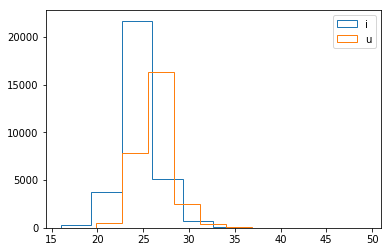

In [13]:
# Comprehension list pour récupérer les magnitudes
mags = [table[table['filter'] == f]['modelfit_CModel_mag'] for f in filters]

# Histogramme pour tout les filtres
fig, ax = plt.subplots()
for mag, filt in zip(mags, filters):
    # Supprimer les nan en appliquant un masque estimé à la volée
    mag = mag[np.isfinite(mag)] 
    ax.hist(mag, label=filt, histtype='step')
ax.legend()

In [14]:
# 2.2 Supprimer les objets dont les erreur sur les 
# magnitudes sont > 0.05 mag

# Création des masks et application
mask = np.isfinite(table['modelfit_CModel_mag'])
mask &= table['modelfit_CModel_magSigma'] < 0.05
table = table[mask]

# Comprehension list pour récupérer les magnitudes
mags = [table[table['filter'] == f]['modelfit_CModel_mag'] for f in filters]
magsSigma = [table[table['filter'] == f]['modelfit_CModel_magSigma'] for f in filters]

/home/chotard/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


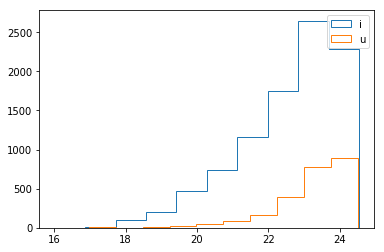

In [15]:
# Histogramme pour tout les filtres
fig, ax = plt.subplots()
for mag, filt in zip(mags, filters):
    ax.hist(mag, label=filt, histtype='step')
ax.legend()

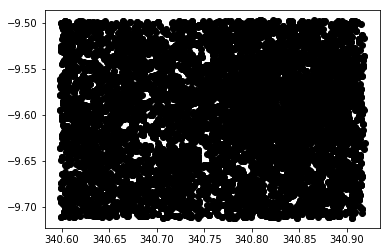

In [16]:
# 2.3
plt.plot(table['coord_ra_deg'], table['coord_dec_deg'], 'ok')

## Exercice 3 - Coordonnées et séparation angulaire

1. Dans cette zone du ciel se trouve l'amas de galaxie MACSJ2243.3-0935. Récupérer ses coordonnées en utilisant le module `coordinates.SkyCoord`. 
2. En utilisant les modules `coordinates.SkyCoord` et `units` d'Astropy, calculer les séparations angulaires de tout les objets du catalogues par rapport au centre de l'amas de galaxie
    
3. Tracer la carte du ciel (`ra` vs. `dec`), avant et après l'application d'un filtre pour ne conserver que la zone du ciel dans un rayon de 0.05 deg autour du centre de l'amas.

In [17]:
# 3.1 Récupération des coordonées de l'amas MACSJ2243.3-0935
from astropy.coordinates import SkyCoord
# amas_coord = SkyCoord.from_name('MACSJ2243.3-0935')
amas_coord = SkyCoord(340.83, -9.59, unit='deg')

In [18]:
# 3.2 Calcul des séparations angulaires
from astropy import units as u
ra = table['coord_ra_deg'] * u.deg
dec = table['coord_dec_deg'] * u.deg
sep = amas_coord.separation(SkyCoord(ra, dec))

In [19]:
# 3.3 Filtrer et faire la figure de la carte du ciel
mask = sep.deg < 0.05

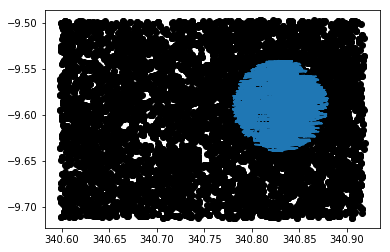

In [20]:
plt.plot(ra, dec, 'ok')
plt.plot(ra[mask], dec[mask])

## Exercice 4 - Groupes

1. Appliquer le masque estimé précédemment à la table pour ne conserver que la zone centrée sur l'amas
2. Tracer, pour tout les objets, la magnitude 'u' en fonction de la magnitude 'i'. 

          Avant d'avoir appliqué le masque sur `magSigma`, chaque objet possédait 2 lignes, une pour chaque filtre. Cette coupure a fait disparaitre un certain nombre de ces lignes, et de nombreux objets n'ont plus qu'une mesure. Il est donc nécessaire de les supprimer du catalogue.


3. Grouper les objets par `objectId` (`group_by`)
4. Créer un masque pour ne conserver que les objets ayant 2 mesures de magnitudes
5. Appliquer ce filtre, et tracer le figure du 2.

In [21]:
# 4.1 Grouper, filtrer, et tracer mag_u vs. mag_i
# Ne conserver que les données proche de l'amas
centered_table = table[mask]

In [22]:
# 4.2 Grouper les objets par 'objectId'
# chaque objet devrait avoir deuxx lignes de données, une pour 
# chaque filtre
grouped_table = centered_table.group_by('objectId')

In [23]:
# 4.3 Fabrication du masque
# La différence des indices est une façon rapide de 
# connaitre la taille de chaque groupe
filt = (grouped_table.groups.indices[1:] - grouped_table.groups.indices[:-1]) == len(set(centered_table['filter']))
print(len(centered_table), len(grouped_table), len(grouped_table.groups[filt]))

2113 2113 686


In [24]:
# 4.4 Application du masque
new_table = grouped_table.groups[filt]
print(len(centered_table[centered_table['filter' ] == 'i']['modelfit_CModel_mag']))
print(len(centered_table[centered_table['filter' ] == 'u']['modelfit_CModel_mag']))
print(len(new_table[new_table['filter' ] == 'i']['modelfit_CModel_mag']))
print(len(new_table[new_table['filter' ] == 'u']['modelfit_CModel_mag']))

1768
345
343
343


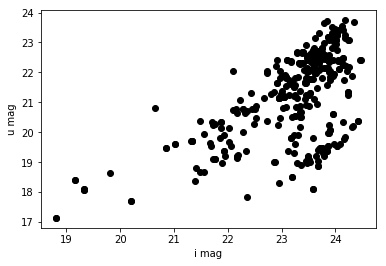

In [25]:
# figure
plt.plot(new_table[new_table['filter' ] == 'u']['modelfit_CModel_mag'],
         new_table[new_table['filter' ] == 'i']['modelfit_CModel_mag'], 'ok')
plt.xlabel('i mag')
plt.ylabel('u mag')

## Exercice 5 - Coordonnées et comparaison de catalogues

4. Créez un "faux" catalogue de référence à partir de l'original selon la recette suivante

        nra = ra[100:200] + (np.random.random(100) / 10000.) * u.deg
        ndec = dec[100:200] + (np.random.random(100) / 10000.) * u.deg        

5. Faire un match du nouveau catalogue sur l'ancien en utilisant une méthode du module SkyCoord.
6. Tracer l'histogramme des distances du catalogue initial au (faux) catalogue de référence en `mas`.

In [26]:
# 5.1  
nra = ra[100:200] + (np.random.random(100) / 10000.) * u.deg
ndec = dec[100:200] + (np.random.random(100) / 10000.) * u.deg

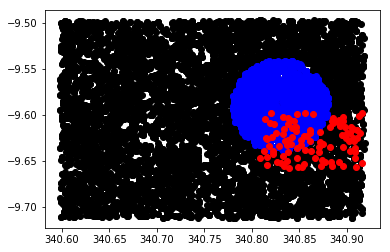

In [27]:
plt.plot(ra, dec, 'ok')
plt.plot(ra[mask], dec[mask], 'ob')
plt.plot(nra, ndec, 'or')

In [28]:
# 5.2 Matcher les catalogues
coords = SkyCoord(ra, dec, unit='deg')
fakecat = SkyCoord(nra, ndec, unit='deg')
idx, d2d, d3d = fakecat.match_to_catalog_sky(coords)

In [29]:
from astropy import units as u
d2d = d2d.value * u.deg

(array([  3.,   4.,   7.,   7.,   8.,  21.,  22.,  19.,   6.,   3.]),
 array([  35.67741525,   79.47506603,  123.27271681,  167.07036759,
         210.86801837,  254.66566915,  298.46331993,  342.26097071,
         386.05862149,  429.85627227,  473.65392305]),
 <a list of 10 Patch objects>)

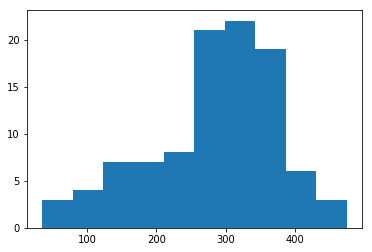

In [30]:
# 5.3 Histogramme
plt.hist(d2d.to('mas'))

In [31]:
bad = np.where(d2d.to('mas') > 300 * u.mas)
bad

(array([ 2,  3,  5,  6,  7,  8, 11, 12, 13, 15, 18, 19, 22, 27, 29, 30, 31,
        32, 33, 35, 38, 39, 40, 42, 44, 46, 49, 50, 53, 56, 59, 64, 68, 69,
        70, 71, 72, 74, 76, 77, 79, 83, 91, 94, 95, 96, 97, 98]),)

In [32]:
idx  # indice dans la catalogue 1 des matches du (faux) catalogues de références

array([ 458,  459, 2668,  464,  465,  105, 1200,  107, 2677, 1210, 2686,
       1214,  112, 2690, 1221, 2691,  116,  117, 1245, 1247,  485,  486,
        488, 2767, 2787, 2790,  126,  498,  128,  500,  130, 1303,  132,
        133,  134, 2851,  509,  510,  138,  139,  140,  141,  142, 1344,
       1356, 2902, 2904,  147,  527,  149,  150, 1383,  152,  153,  154,
        155, 1401,  157, 2968, 1407, 2996,  161,  162,  547,  548,  165,
       3018, 3028,  168,  169, 1470,  171, 1483,  173, 1489,  557,  176,
        562, 1500, 1512, 3146, 3148,  574,  576, 3182,  185, 1531,  587,
       3207, 1542, 3219,  191,  595, 3257, 3284,  195,  602,  603, 1596,
       1597])

## Exercice 6

6. Crées une nouvelle table astropy pour ce nouveau (faux) catalogue contenant les données des objets les plus proches dans le premier catalogue (toute les clés). 
7. Ajouter 3 colonnes contenant les sorties de la méthode de match
8. Sauvegarder votre nouveaux catalogue dans un fichier HDF5.

In [33]:
# 6.1 Nouveau catalogue
ntable = table[idx]

In [34]:
# 6.2 Ajout de colonnes 
from astropy.table import Column
cols = [Column(idx, name='idx'), Column(d2d, name='2d2'), Column(d3d, 'd3d')]
ntable.add_columns(cols)

In [35]:
ntable

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg,idx,2d2,d3d
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
12.124650021,0.570660536808,True,nan,12.2413831984,False,False,0.628060816787,14.1163449833,False,1099914292820,15.4242224746,14.8975441133,False,nan,nan,0.0,False,False,False,False,0.57066055188,nan,False,False,False,nan,12.9054652041,False,5.9487698442,0,12.2413811217,True,nan,0.596296993342,False,True,nan,True,"1,3",u,0.242534478709,nan,-0.16855833144,False,False,14.1163465661,24.1256943416,0.043891446842,24.0294917981,0.0442102263956,24.0672132998,0.0434582525506,24.1256942199,0.0438914430799,7464.8558605,12966.307363,340.839405367,-9.65768099328,458,6.63458533869e-05,1.15795358692e-06
76.8452023154,0.600170617905,True,nan,76.8452042501,False,False,0.60017068062,118.529611785,False,1099914292822,118.529615152,118.376007277,False,nan,nan,1.0,False,False,False,False,0.599393355313,nan,False,False,False,nan,76.804613127,False,5.94935625966,0,76.801693487,True,nan,0.59948883936,False,True,nan,True,"1,3",u,0.678517527506,nan,-0.168526983837,False,False,118.355517562,21.8154328451,0.0054975879789,21.8154328142,0.00549758839721,21.8168407813,0.00549846841613,21.8170287277,0.00549854438694,6820.21043121,13000.3883106,340.873004498,-9.65588490794,459,4.8079954286e-05,8.39153506501e-07
1181.90231294,0.897403275406,True,nan,1178.99695567,False,False,0.916056514048,1389.83106765,False,1099914292852,1414.9686042,1375.53972557,False,nan,nan,0.0,False,False,False,False,0.897403250756,nan,False,False,False,nan,1169.69906516,False,5.9490000827,0,1178.99696302,True,nan,0.890237991744,False,True,nan,True,"1,3",i,93.9780954316,nan,-0.168545798209,False,False,1389.83116075,19.1425949613,0.000701051551556,19.1231329908,0.000702910099879,19.1538171567,0.000702679537726,19.1425948886,0.000701051485336,7211.75627482,12979.9472181,340.852597062,-9.65696289205,2668,8.48852516706e-05,1.48152712797e-06
15.3225020046,0.477211122848,True,nan,15.3226522892,False,False,0.477198496253,23.3951962974,False,109991

In [36]:
# 6.3 Sauvegarder le nouveau catalogues
ntable.write('newtable.hdf5', path='deepCoadd_forced_src', overwrite='True')

## Exercice 7 - WCS

1. Charger le WCS du ficher de données (`path=wcs`)
2. Utiliser la fonction suivante pour le convertir dans le bon format (un dictionnaire)

        def load_wcs(wcs):
            return {k: wcs[k].item().decode() if isinstance(wcs[k].item(), bytes) else wcs[k].item() for k in wcs.keys()}
        
3. À l'aide de la classe `WCS` du module `astropy.wcs`, créer un objet WCS à partir du dictionnaire obtenu
4. Convertir les coordonnées des objets du catalogues en pixel, et tracer la carte des objets en pixel.
5. Faite la transformation inverse, et vérifier l'integrité des données (valeurs des coordonnées avant et après).

In [37]:
# 7.1 chargement du WCS
from astropy.wcs import WCS, utils
wcs = Table.read(mon_fichier, path='wcs')

In [38]:
wcs

CD1_2,CD1_1,CRVAL2,CRPIX1,CRPIX2,CRVAL1,CUNIT2,NAXIS,CUNIT1,CTYPE2,CTYPE1,CD2_2,CD2_1,RADESYS
float64,float64,float64,float64,float64,float64,bytes3,int64,bytes3,bytes8,bytes8,float64,float64,bytes4
0.0,-5.13888888889e-05,-9.50212029171,16000.0,16000.0,340.394550607,deg,2,deg,DEC--TAN,RA---TAN,5.13888888889e-05,0.0,ICRS


In [39]:
# 7.2 transformation en dictionnaire
nwcs = {k: wcs[k].item().decode() if isinstance(wcs[k].item(), bytes) else wcs[k].item() for k in wcs.keys()}
nwcs

{'CD1_1': -5.13888888888889e-05,
 'CD1_2': 0.0,
 'CD2_1': 0.0,
 'CD2_2': 5.13888888888889e-05,
 'CRPIX1': 16000.0,
 'CRPIX2': 16000.0,
 'CRVAL1': 340.394550606816,
 'CRVAL2': -9.50212029170686,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'NAXIS': 2,
 'RADESYS': 'ICRS'}

In [40]:
# 7.3 création d'un objet astropy WCS
owcs = WCS(nwcs)

In [41]:
# 7.4 transformation en pixel et figure
ra = table['coord_ra_deg'] * u.deg
dec = table['coord_dec_deg'] * u.deg
coords = SkyCoord(ra, dec)
x, y = utils.skycoord_to_pixel(coords, owcs)

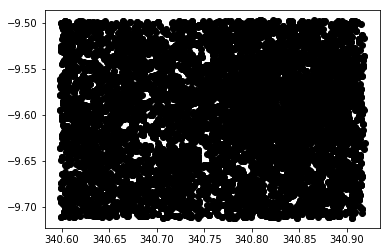

In [42]:
ax = plt.subplot()
ax.plot(coords.ra, coords.dec, 'ok')

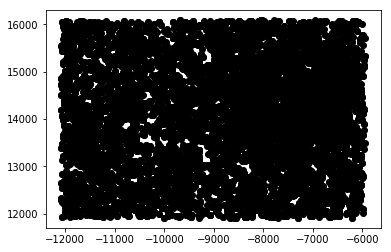

In [43]:
ax = plt.subplot()
ax.plot(-x, y, 'ok')

In [44]:
# 7.5 transformation inverse et vérification
coords2 = utils.pixel_to_skycoord(x, y, owcs)

In [45]:
all(coords.ra == coords2.ra)

True

In [46]:
coords.dec == coords2.dec

array([False, False,  True, ..., False, False, False], dtype=bool)

In [47]:
coords.dec.deg[0]

-9.7107127827344062

In [48]:
coords2.dec.deg[0]

-9.7107127827344115

## Exercice 8 - Stacking

1. Créer 2 sous-tables d'une centaine d'éléments (ligne) à partir de la table principale
2. Les "stacker" verticalement pour reformer une table unique
3. Vérifier que la taille de la table "stackée" est bien égale à la somme des tailles des sous-tables

In [49]:
# 8.1 Création de deux sous-tables
t1 = table[50:100]
t2 = table[200:280]

In [50]:
# 8.2 stacking
from astropy.table import vstack
t3 = vstack([t1, t2])
print(len(t1), len(t2), len(t3))
print(len(t1.keys()), len(t2.keys()), len(t3.keys()))

50 80 130
59 59 59
